# Programming for Data Science and Artificial Intelligence

## Pandas

### Readings: 
- [VANDER] Ch3
- https://pandas.pydata.org/docs/

Pandas is a newer package **built on top of NumPy**, and provides an efficient implementation of a DataFrame.

DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data

Offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs

Although NumPy ndarray data structure provides essential features, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) 

Pandas provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In [88]:
import pandas as pd

## Series

A Pandas <code>Series</code> is a one-dimensional array of indexed data. It can be created from a list or array as follows:

### Creating a series from list

In [89]:
pd.__version__

'1.4.3'

### Creating a series from numpy array

In [90]:

df = pd.read_csv('/Volumes/ExternalSSDForMac/AITLecture/CSforDSAIAUG22/codealongcsfordsaiAti/howlongwelive.csv')

### Attributes

In [91]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Indexing

In [92]:
df.isna().values.any()

True

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### DROP OBJECT

In [94]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [95]:
len(df[df.Status == 'Developed'])

512

In [96]:
df.Alcohol.describe()

count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64

### Letter indexing

In [97]:
alcoun = df[df.Alcohol >= df.Alcohol.median()].Country.unique()

### Combined indexing

In [98]:
len(alcoun)

106

### Pandas and dictionary

In [99]:
a = df.Schooling >= df.Schooling.median()
b = df.GDP >= df.GDP.median()

In [100]:
schgdp = df[(df.Schooling >= df.Schooling.median()) & (df.GDP >= df.GDP.median())]

In [101]:
scu = schgdp.Country.unique()

### Pandas and scalar

In [102]:
len(scu)

96

In [103]:
df[df.isna().values]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3


## Dataframe

DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.  DataFrame as a sequence of aligned Series objects.

### Create dataframe with two dict

In [104]:
!pip install seaborn

In [105]:
import seaborn as sns

### Indexing

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

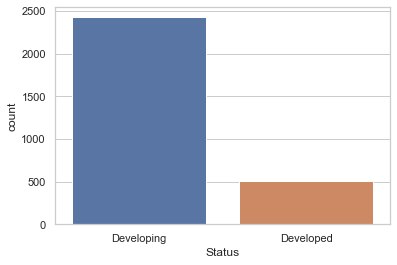

In [106]:
sns.countplot(df.Status)

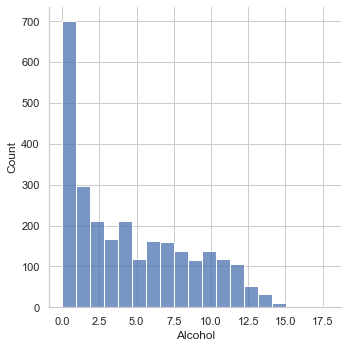

In [107]:
sns.displot(df.Alcohol)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,imcome,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


AttributeError: 'DataFrame' object has no attribute 'header'

In [149]:

df = pd.read_csv('/Volumes/ExternalSSDForMac/AITLecture/CSforDSAIAUG22/codealongcsfordsaiAti/howlongwelive.csv')

In [162]:
df.columns = df.columns.str.strip()


### Attributes

In [163]:
df.columns

Index(['Country', 'Year', 'Status', 'lexp', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='lexp'>

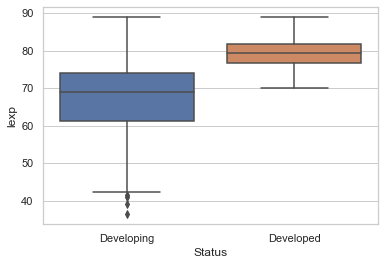

In [161]:
sns.boxplot(x=df.Status,y=df.lexp)

### Other ways to create

In [166]:
c = df.corr().abs()


In [173]:
c.lexp

Year                               0.170033
lexp                               1.000000
Adult Mortality                    0.696359
infant deaths                      0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                            0.157586
BMI                                0.567694
under-five deaths                  0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
HIV/AIDS                           0.556556
GDP                                0.461455
Population                         0.021538
thinness  1-19 years               0.477183
thinness 5-9 years                 0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: lexp, dtype: float64

In [188]:
from matplotlib import pyplot


In [194]:
sns.set(rc={"figure.figsize":(8, 4),'dpi':400})

KeyError: 'dpi is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

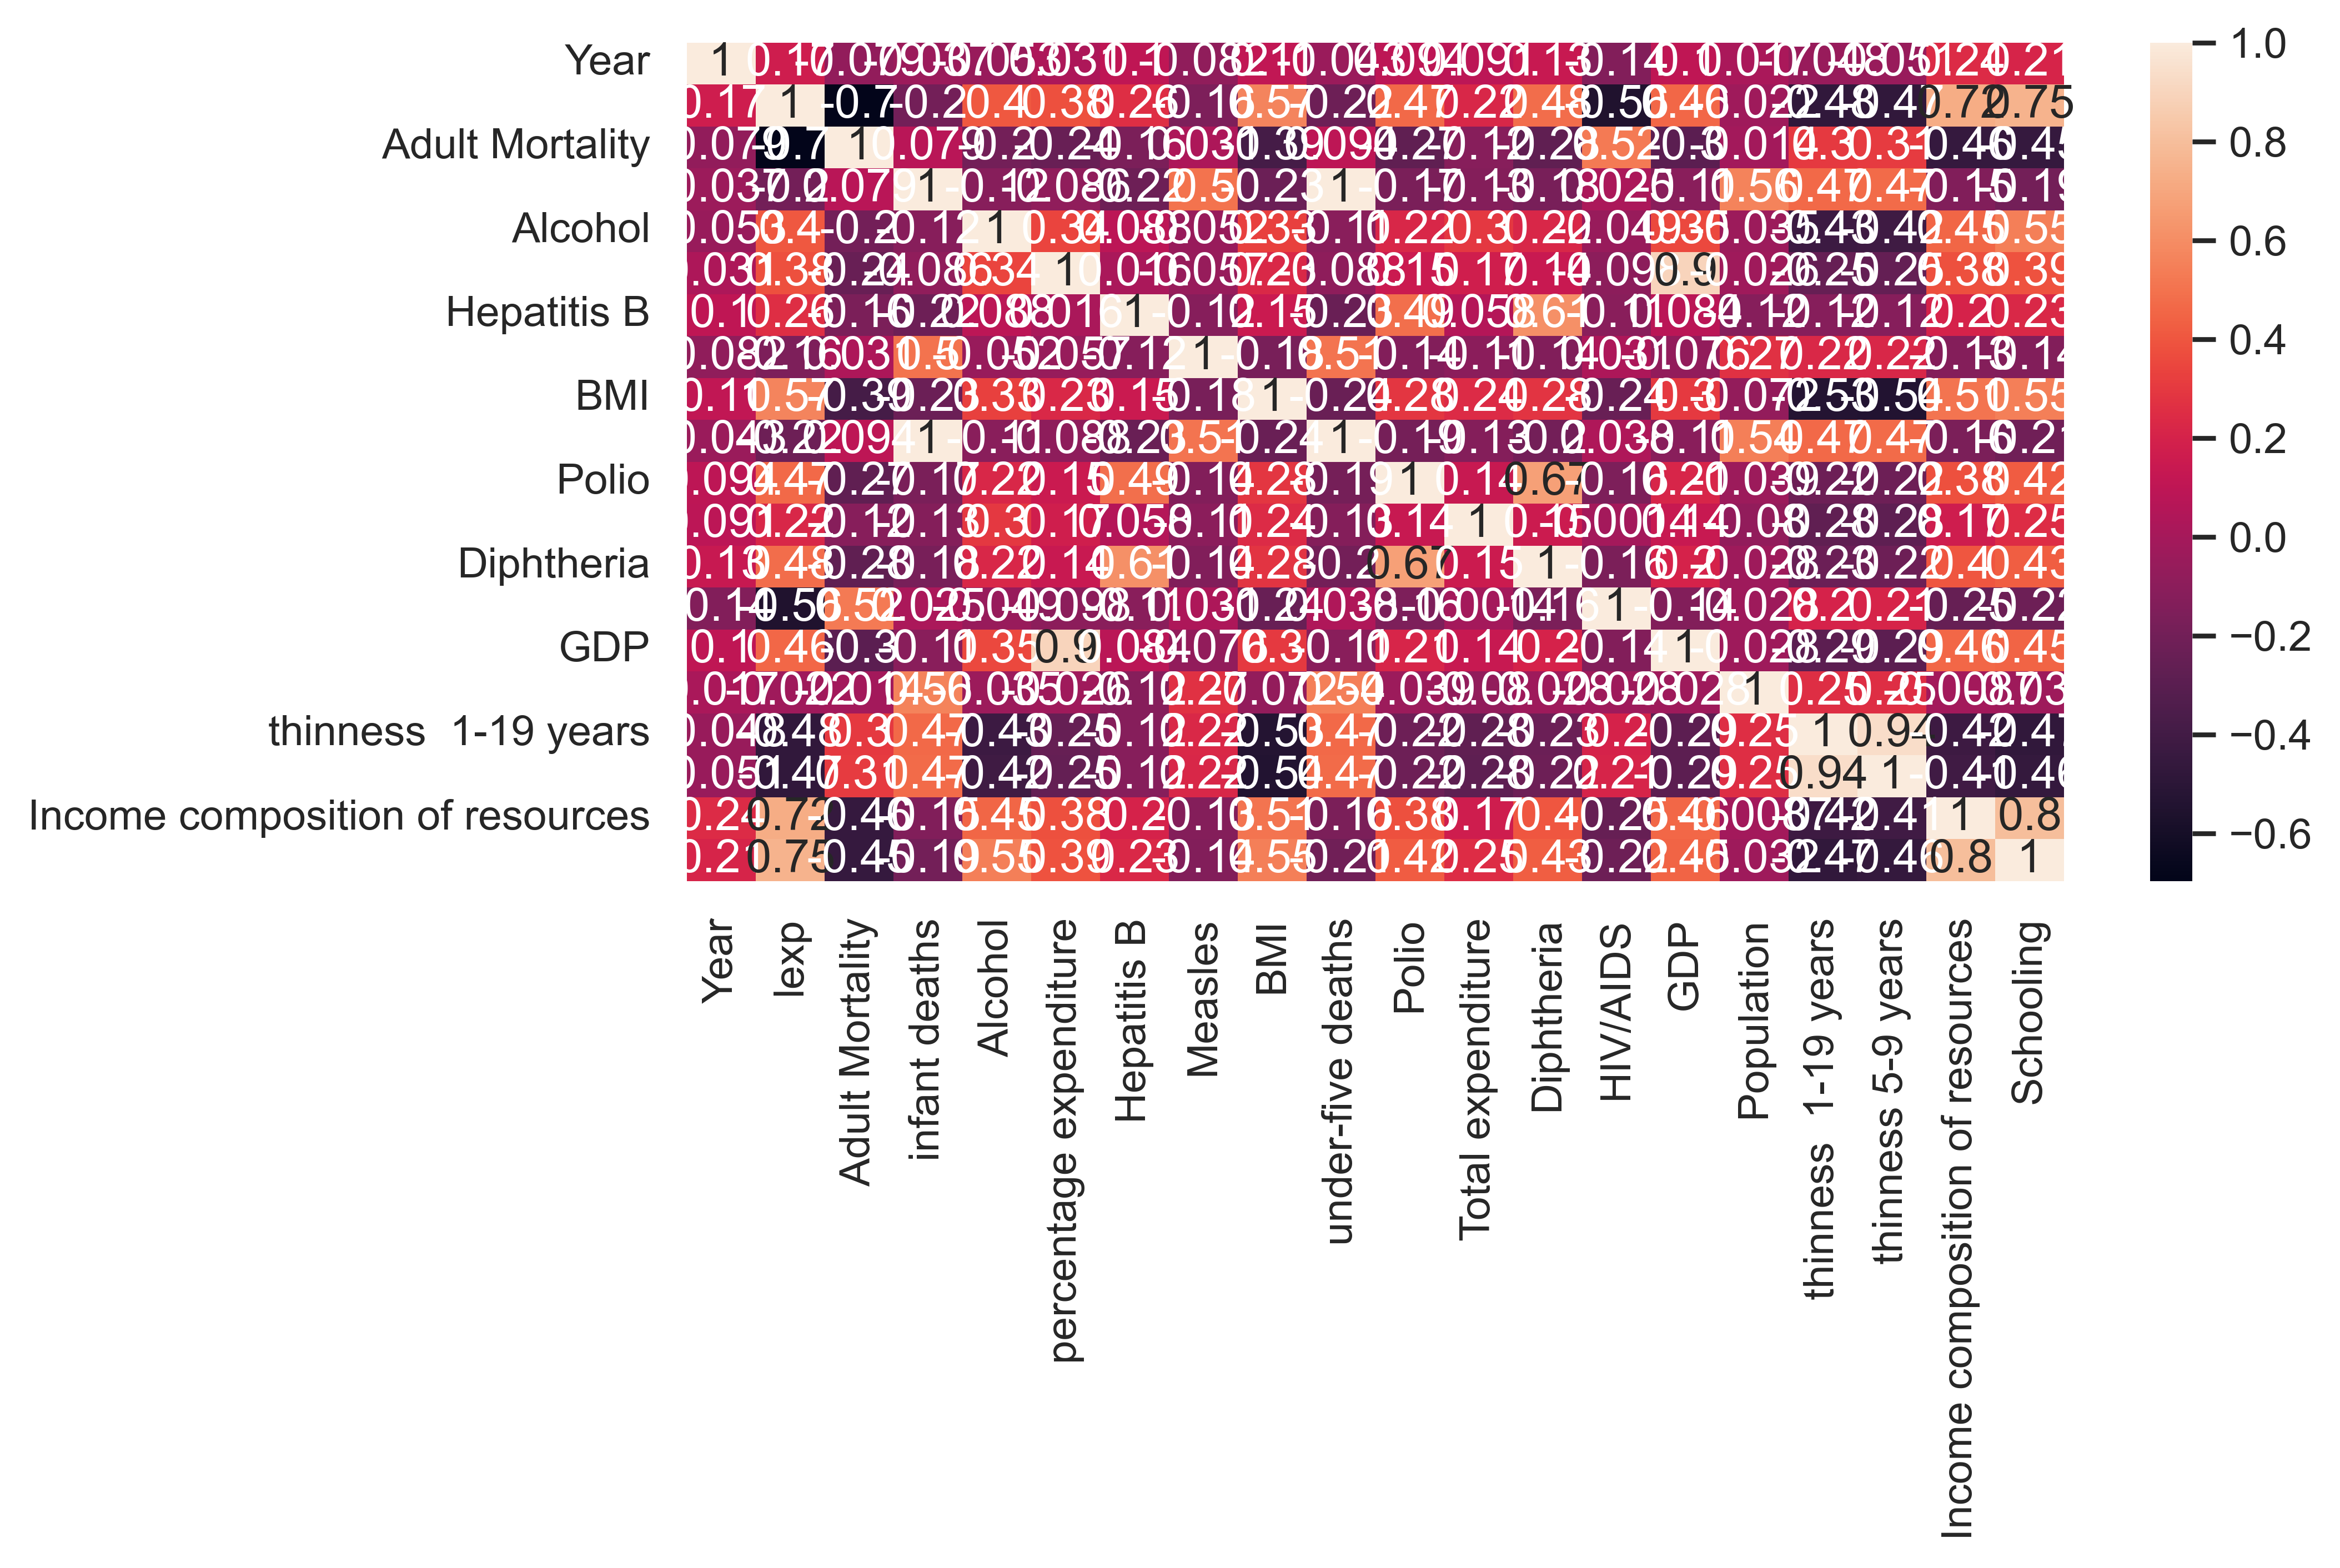

In [199]:
pyplot.figure(dpi=500)
sns.heatmap(df.corr(),annot=True)
pyplot.show()

 ## Series indexing/slicing/fancy Indexing

### Explicit vs. Implicit index

### Adding values

### "in"

### keys()

#### items()

### values()

### masking

### fancy indexing

### iloc vs. loc

## DataFrame indexing/slicing/fancy Indexing

### dictionary style access

### attribute style access

### attribute style does not always work

### Such access only for columns

### Feature engineering

### iloc and loc

#### masking + fancy

### Indexing vs. slicing

## Broadcasting

### Basic broadcasting

### Index alignment

### Dataframe and series

### === Task 1 ===

1. Load the csv file "howlongwelive.csv" in the data folder into dataframe <br>
Hint: https://www.kaggle.com/rtatman/reproducibility-tips-absolute-vs-relative-paths

2. Print the first 2 rows, and last 2 rows

3. Print the shape

4. Print the feature (column) names

5. Print the summary using .describe()

6. Since Hepatatis B has a lot of nans, and highly correlate with Diptheria, drop column Hepatatis.  Also drop column Population since there are way too many nans

7. Convert <code>Status</code> to 0 or 1. (0 for Developing and 1 for Developed)

8. Rename column <code>thinness 1-19 years</code> to <code>thinness 10-19 years</code>

9. Get all columns except Life Expectancy, and convert to numpy array called X

10. Get the column life expetancy and convert to numpy array called y

## Handling missing data

### np.nan

### Create a pd series with np.nan and None

### isnull()

### not null

### dropna()

### fillna()

## Concatenating Datasets

<center><img src="../figures/join.png" width=700 height=500 /></center>

### Dataframe concatenation

### Join inner

## Merging Datasets with ID

## Aggregation

GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.  For the purpose of the following subsections, we'll use this DataFrame:

### === Task 2 ===

1. Continuing "howlongwelive.csv", check whether which column has how many missing data

2. Fix all missing data using means

3. Perform a <code>groupby</code> country.  Which country has the lowest/highest average life expectancy?

4. Perform a <code>groupby</code> status.  Is there any strong difference between developed and developing countries in their life expectancy?

5. Create another dataframe manually with 2 columns. First column is the ID column with same value as country column. Also add another column Noise_level, and populate with random values (whatever you like).  

6. Merge the two datasets together based on the ID column.

## Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.  Let’s first understand how Python treat dates and times

Using the dateutil module, you can parse dates from a variety of string formats

Once you have a datetime object, you can do things like printing the day of the week:

We can similarly create numpy using type np.datetime64 which is a very efficient way to store datetime

Given its numpy type, we can quickly do vectorized operations on it

Pandas uses **Timestamp** object,  which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a **DatetimeIndex** that can be used to index data in a Series or DataFrame

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

A useful method is date_range, which generates date from specified start and end

## Stock

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

#### resample

<center><img src="../figures/03.01-pd-resample.png" width=500 height=500 /></center>

#### asfreq

<center><img src="../figures/03.02-pd-asfreq.png" width=500 height=500 /></center>

Pandas has two closely related methods: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.  Here we will both shift() and tshift() by 900 days;

Example
<center><img src="../figures/03.04-pd-shift.png" width=300 height=300 /></center>

Example
<center><img src="../figures/03.05-pd-shiftexample.png" width=300 height=300 /></center>

Example of rolling sum
<center><img src="../figures/03.03-pd-rollingwindow.png" width=300 height=300 /></center>

## Bicycle Counts

### === Task 3 ===

1. Load "data/appl_1980_2014.csv" into df

2. Transform Date column to datetime type

3. Then filter only with year not less than 1987

4. Sort the index in an ascending order (oldest date first) - use sort_index

5. We want to know how apple does on end of every month, thus get the mean value for each columns, resample at last buiness day of each month (i.e., BM)

6. BTW, how many months do we have in our data?

7. Compare the differences between this year and last year High column, using shift(), where the differences is simply this_year - last_year.  Plot this graph, where x-axis is date, and y-axis is the gain/loss

8. Perform a rolling mean (moving average) of Close with window size of 100 days

9. Load microsoft data using this code <code>microsoft = data.DataReader('MSFT', start='1987', end='2014', data_source='yahoo')</code>.  Compare Apple and Microsoft of their return rate of "close" price based on year 2000 onward, where the formula is simply <code>close price / close price [0]</code> where close price [0] is simply the first close price of year 2000.